## Importing Modules


In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Functions


In [0]:
def Window1(L,s):

    output = np.zeros(s)
    e = int(s/2)
    f = int(L/2)

    if (s%2 == 0 and L%2 == 0):
        output[int((s-L)/2):int((s-L)/2) + L] = np.ones(L)
    if (s%2 == 0 and L%2 == 1):
        output[e-f-1:e+f+1] = np.ones(L+1)
    if (s%2 == 1 and L%2 == 0):
        output[e-f:e+f+1] = np.ones(L+1)
    if (s%2 == 1 and L%2 == 1):
        output[e-f:e+f+1] = np.ones(L)

    return output        

In [0]:
def Graph2(L):

    if (L%2 == 0):
        s = L+1
    else:
        s = L

    
    output = np.zeros(s)
    l = int(s/2)
    o = np.zeros(l)

    for i in range(l):
        o[i] = i / l

    output[l] = 1
    output[0:l] = o
    output[l+1:2*l+1] = o[::-1]

    return output
        
     

def Window2(L,s):

    output = np.zeros(s)
    e = int(s/2)
    f = int(L/2)

    if (s%2 == 0 and L%2 == 0):
        output[int((s-L)/2) - 1:int((s-L)/2) + L] = Graph2(L)
    if (s%2 == 0 and L%2 == 1):
        output[e-f-1:e+f] = Graph2(L)
    if (s%2 == 1 and L%2 == 0):
        output[e-f:e+f+1] = Graph2(L)
    if (s%2 == 1 and L%2 == 1):
        output[e-f:e+f+1] = Graph2(L)

    return output

In [0]:
def Graph3(L):

    if (L%2 == 0):
        s = L+1
    else:
        s = L

    
    output = np.zeros(s)
    l = int(s/2)
    o = np.zeros(l)

    for i in range(l):
        o[i] = (np.sin(np.pi*i / l))**2

    output[l] = 0
    output[0:l] = o
    output[l+1:2*l+1] = o[::-1]

    return output
        
   
def Window3(L,s):

    output = np.zeros(s)
    e = int(s/2)
    f = int(L/2)

    if (s%2 == 0 and L%2 == 0):
        output[int((s-L)/2) - 1:int((s-L)/2) + L] = Graph3(L)
    if (s%2 == 0 and L%2 == 1):
        output[e-f-1:e+f] = Graph3(L)
    if (s%2 == 1 and L%2 == 0):
        output[e-f:e+f+1] = Graph3(L)
    if (s%2 == 1 and L%2 == 1):
        output[e-f:e+f+1] = Graph3(L)

    return output

In [0]:
def function(a=1,l=-3,m=3,T=10):
    
    time = np.arange(l,m,1/T)
    s = time.shape[0]
    output = np.zeros(s)

    t = np.multiply(time,time)
    t = (t)*(-1*np.pi)*(a**2)

    output = np.exp(t)

    plt.plot(time,output)
    plt.show()

    return output,time   

In [0]:
def function_FT(a=1,l=-3,m=3,T=10):
    
    time = np.arange(l,m,1/T)
    s = time.shape[0]
    output = np.zeros(s)

    t = np.multiply(time,time)
    t = (t)*(-1*np.pi)/(a**2)

    output = np.exp(t)/(a**2)

    plt.plot(time,output)
    plt.show()

    return output,time   

In [0]:
def function_DTFT(R,n,T=10):								        
    
    f = 1/R

    k = (function_FT()[0]).shape[0]
    m = int(k/(2*T))
    a = int(f*int(n/2)) + m
    size = T*(2*a)

    
    U = np.zeros(size)
    time = np.linspace(-(a+m),(a+m),size)

    for i in range(n):
        output = np.zeros(size)
        p = ((i*int(f)) + m)*T
        l = m*T
        output[p-l:p+l] = function_FT()[0]
        U = U + output

    
    plt.plot(time,U)
    plt.show()

    return U,time

In [0]:
def function_DFT(a,N=None):								        
    
    output = np.fft.fft(a,n=N)
    w = a.shape[-1]
    s = output.shape[0]
    freq = np.fft.fftfreq(s)

    plt.stem(freq,np.abs(output))
    plt.show()

    plt.stem(freq,np.angle(output))
    plt.show()

    return output,time

## Sampling and Windowing

### 3a)

$\mathcal{F} f(s)=\frac{1}{a^{2}} e^{-\pi s^{2} / a^{2}}$

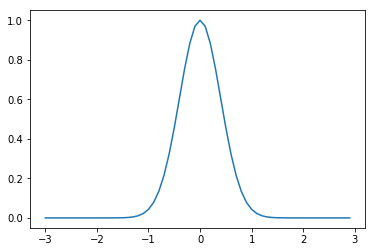

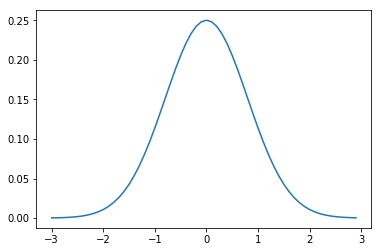

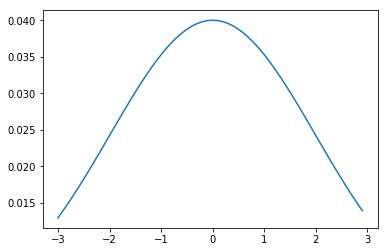

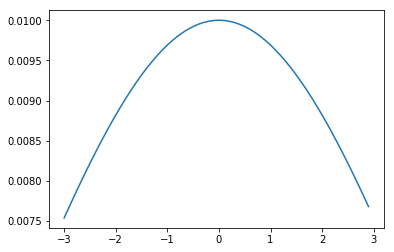

In [0]:
N = [1,2,5,10]

for i in N:
    function_FT(a=i)

### 3b)

$f[n] = f(nR_{time})$ for integer values of n.

The Fourier Transform $f[n]$ is $\frac{1}{R_{time}}\mathcal{F}f(s)$. It is periodic with period $\frac{1}{R_{time}}\$.

$ s = \frac{\omega}{2\pi} $

Or it can also be written as
$f(j\omega) = \sum_{n=-\infty}^{\infty} f[n] e^{-j \omega n}$

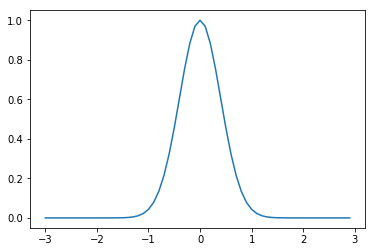

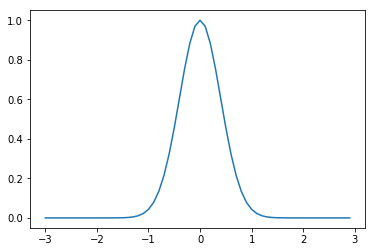

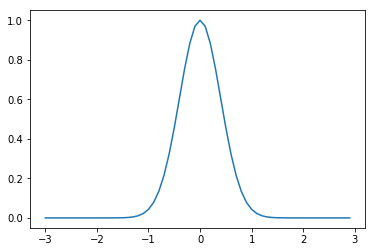

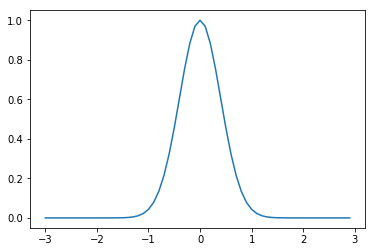

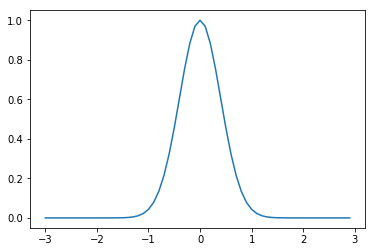

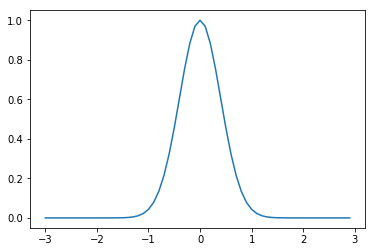

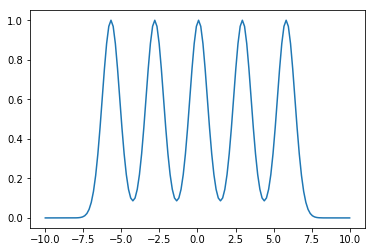

In [0]:
func_DTFT = function_DTFT(0.5,5)[0]

### 3c)

Let $fw(t) = f(t)w(t)$

$fw[n] = fw(nR_{time})$ where $-L / 2 \leq n R_{\text {time }}<L / 2$

$fw(j\omega) = \sum_{n=-\infty}^{\infty} fw[n] e^{-j \omega n} = \sum_{n=-L/2}^{L/2} f[n] e^{-j \omega n}$  

### 3d)

$\mathcal{F} f\left(m R_{\mathrm{freq}}\right) = \mathcal{F} f[k]$

$\mathcal{F} f[m2\pi R_{\mathrm{freq}}] = f(jm2\pi R_{\mathrm{freq}})$

$\mathcal{F} f[m2\pi R_{\mathrm{freq}}] = \sum_{m} f[n] e^{-jnm2\pi R_{\mathrm{freq}}}$ where m is an integer and also follows the condition $\frac{-1}{2 L R_{\mathrm{freq}}} \leq m<\frac{1}{2 L R_{\mathrm{freq}}}$

### 3e)

$2[\frac{L}{2R_{time}}] + 1$ = No.of samples that are stored in computer in time domain.

$2[\frac{1}{2LR_{freq}}] + 1$ = No.of samples that are stored in the computer in frequency domain.

### 3f)

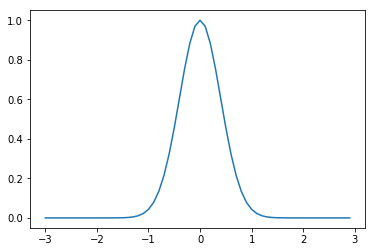

In [0]:
func,time = function()

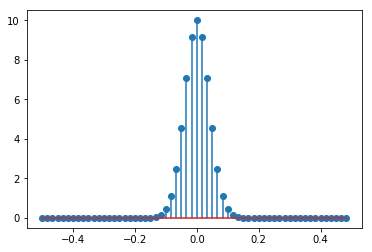

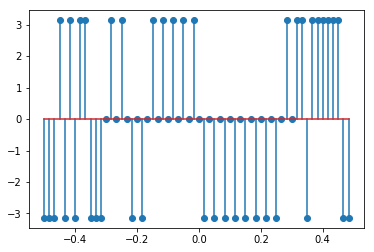

In [0]:
dummy1,dummy2 = function_DFT(func)

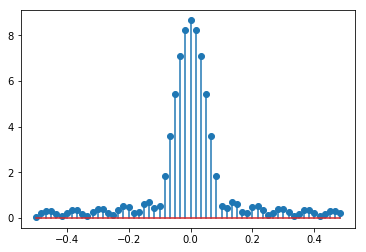

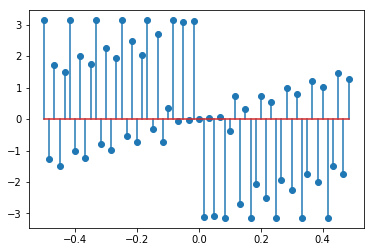

In [0]:
s = func.shape[0]
w1 = Window1(int(s/5),s)
fw1 = np.multiply(func,w1)

dummy1,dummy2 = function_DFT(fw1)

### 3g)

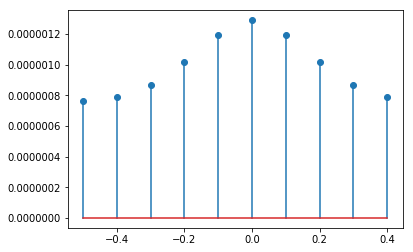

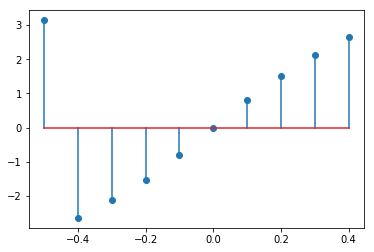

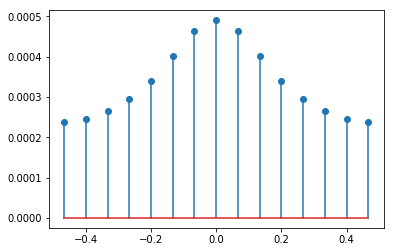

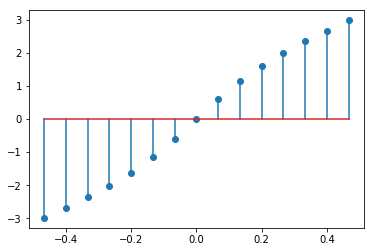

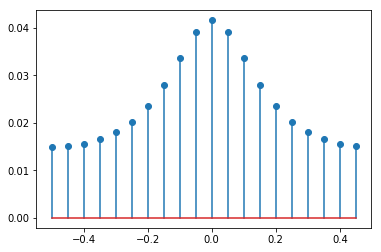

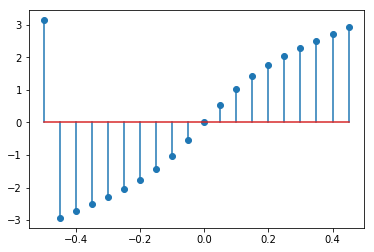

In [0]:
N = [10,15,20]

for i in N:
    dummy1,dummy2 = function_DFT(func,i)

### 3h)

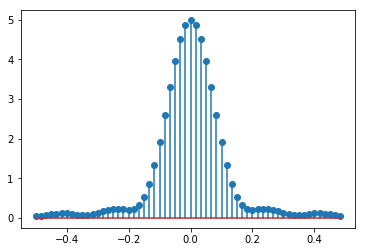

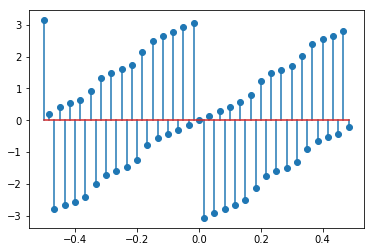

In [0]:
s = func.shape[0]
w2 = Window2(int(s/5),s)
fw2 = np.multiply(func,w2)

dummy1,dummy2 = function_DFT(fw2)

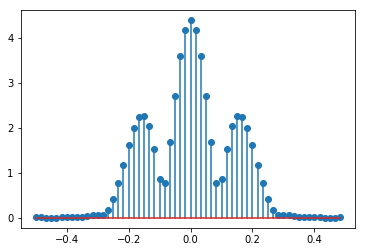

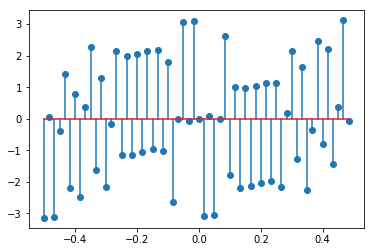

In [0]:
s = func.shape[0]
w3 = Window3(int(s/5),s)
fw3 = np.multiply(func,w3)

dummy1,dummy2 = function_DFT(fw3)

### 3i)

In [0]:
def function2(l=-3,m=3,T=10):
    
    time = np.arange(l,m,1/T)
    s = time.shape[0]
    output = np.zeros(s)

    output = np.cos(2*np.pi*time) + 0.5*(np.sin(4*np.pi*time))

    plt.plot(time,output)
    plt.show()

    return output,time   

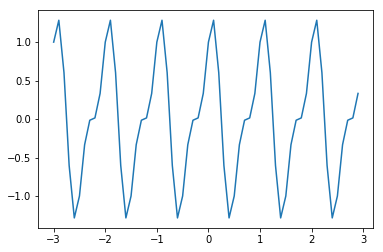

In [0]:
func2 = function2()[0]

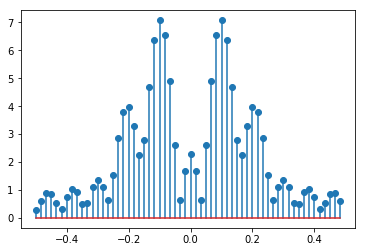

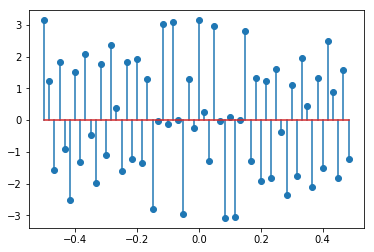

In [0]:
s = func2.shape[0]
w1 = Window1(int(s/5),s)
fw1 = np.multiply(func2,w1)

dummy1,dummy2 = function_DFT(fw1)

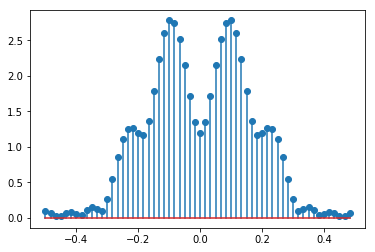

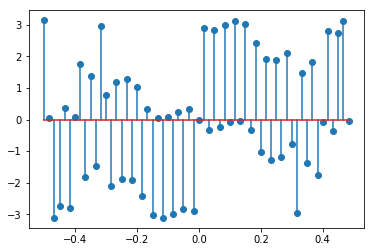

In [0]:
s = func2.shape[0]
w2 = Window2(int(s/5),s)
fw2 = np.multiply(func2,w2)

dummy1,dummy2 = function_DFT(fw2)

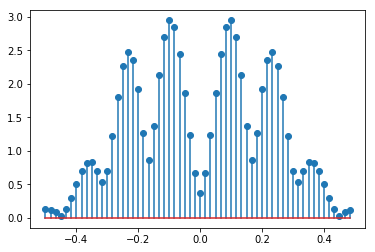

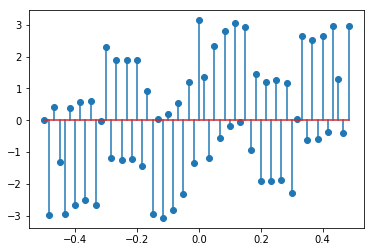

In [0]:
s = func2.shape[0]
w3 = Window3(int(s/5),s)
fw3 = np.multiply(func2,w3)

dummy1,dummy2 = function_DFT(fw3)

## And yet it flies

### 4a)

A camera is taking the video of a helicopter flying. According to the video the rotor blades of the helicopter appears to be at rest

### 4b)

$ R_{2} = \frac{n}{5} R_{1} $



### 4c)

Yes, it is valid. If 6 blades are visible then it can be considered that helicopter has 6 rotor blades.